<a href="https://colab.research.google.com/github/fabnancyuhp/DEEP-LEARNING/blob/main/NOTEBOOKS/REGRESSION_ANNs_on_Structured_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 1 : Red Wine Quality Regression

Here we handle a regression problem on Red wine Quality dataset. We import the data from github. We convert all columns in float32 because it makes the dataset more TensorFlow digestible. 

In [1]:
import pandas as pd
winequality = pd.read_csv("https://raw.githubusercontent.com/fabnancyuhp/DEEP-LEARNING/main/DATA/winequality-red.csv").astype('float32')
winequality.head(3) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0


We want to predict the wine quality. Then the quality is the target value. The others columns from the dataset are the values of the features. We also split the dataset into the train set and the test set.

In [2]:
x = winequality.drop(['quality'], axis=1)
y = winequality['quality']

We display the distinct value of winequality['quality']. Although the target values are integers stored in a float format, we'll make a regression model to predict the quality.  The model we'll build we'll return a float number. We'll add an extra step that rounds the outputs of our model.

In [3]:
winequality['quality'].unique()

array([5., 6., 7., 4., 8., 3.], dtype=float32)

We split the dataset into the train set and the test set.

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.2, random_state=42)

## Building the regression model with tensorflow.keras

We import the keras.layers and keras.models packages:

In [5]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, InputLayer 
from tensorflow.keras.models import Sequential

Now, we are building the neural network and compile the model. You have to notice we import the Adam optimizer to choose the learning rate. The output Dense layer has one unit in the case of a regression problem. We compile the model with the mean absolute error loss and mean absolute error metric.

In [12]:
from tensorflow.keras.optimizers import Adam

model = Sequential([InputLayer(input_shape=(x.shape[1],))
                    ,BatchNormalization()
                    ,Dense(100,activation='relu')
                    ,Dropout(0.3)
                    ,Dense(100,activation='relu')
                    ,Dropout(0.3)
                    ,BatchNormalization()
                    ,Dense(100, activation='relu')
                    ,Dropout(0.3)
                    ,Dense(12,activation='relu')
                    ,Dropout(0.1)
                    ,Dense(1)])

model.compile(optimizer=Adam(learning_rate=0.001),loss='mae',metrics=['mae'])

## Training and evaluating the model

Now, we launch the training stage with 700 epochs. The number of epochs is defining how much time the whole training set will be passed through the network. We use 10 percent of the training as a validation set.

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss",patience=25,verbose=2)

history = model.fit(x_train, y_train, epochs=700,verbose=0,validation_split=0.1,callbacks=[early_stopping])

Epoch 165: early stopping


We evaluate the model on the test set:

In [14]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.5430 - mae: 0.5430


[0.5429996252059937, 0.5429996252059937]

We display the model training history.

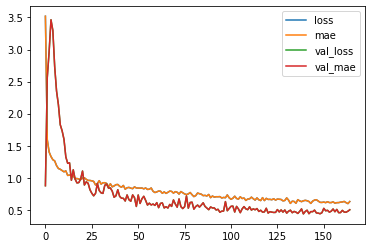

In [15]:
pd.DataFrame(history.history).plot()

## Making predictions with the model
Here, we predict the quality of a new wine from the test set. We reshape to make the vector suitable for the model. You notice we round the predicted value to compare it with the true value.

In [16]:
import numpy as np
new_wine = x_test[15]
new_wine_reshape = x_test[15].reshape(1,11)
pred_model = model.predict(new_wine_reshape)
pred_model_bis = np.round(pred_model[0])
print("Predicted value :"+str(pred_model_bis))
print("The true value :"+str(y_test[15]))

1/1 [==============================] - 0s 100ms/step
Predicted value :[6.]
The true value :7.0


# Example : Regression on California housing dataset
We build an ANN to predict the median house value for California districts, expressed in hundreds of thousands of dollars. The predictive attributes are:
* MedInc        median income in block group
* HouseAge      median house age in block group
* AveRooms      average number of rooms per household
* AveBedrms     average number of bedrooms per household
* Population    block group population
* AveOccup      average number of household members
* Latitude      block group latitude
* Longitude     block group longitude 

In [17]:
import pandas as pd
url = "https://raw.githubusercontent.com/fabnancyuhp/DEEP-LEARNING/main/DATA/california_housing%20(1).csv"
housing = pd.read_csv(url)
housing.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


**We split features from labels**. We also get ride of Latitude,Longitude attributes.

In [18]:
X = housing.drop(['MedHouseVal','Latitude','Longitude'],axis=1).values
Y = housing['MedHouseVal'].values

**We split the data into training and test sets.**

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Build Keras Sequential regression models:
We build three models and evaluate them over the test set.

**First model**

In [20]:
from tensorflow.keras.layers import Dense,BatchNormalization, Dropout
from tensorflow.keras.models import Sequential

model_1 = Sequential()
model_1.add(BatchNormalization())
model_1.add(Dense(13, input_shape=(X.shape[1],), kernel_initializer='normal', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dense(6, kernel_initializer='normal', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dense(1, kernel_initializer='normal'))

model_1.compile(loss='mean_squared_error', optimizer='adam')
history = model_1.fit(X_train,y_train,validation_split=0.1,epochs=60,verbose=0)
model_1.evaluate(X_test,y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.6112


0.6111732721328735

**Second model**

In [21]:
from tensorflow.keras.layers import Dense,BatchNormalization, Dropout
from tensorflow.keras.models import Sequential

model_2=Sequential()
model_2.add(BatchNormalization())
model_2.add(Dense(16,input_shape=(X.shape[1],),activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dense(8,activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dense(4,activation='relu'))
model_2.add(Dense(1,activation='linear'))
model_2.compile(loss='mean_squared_error',optimizer='adam')

history = model_2.fit(X_train,y_train,epochs=60,validation_split=0.1,verbose=0)
model_2.evaluate(X_test,y_test)

129/129 [==============================] - 0s 3ms/step - loss: 0.5743


0.5743415951728821

**Third model**

In [22]:
model_3=Sequential()
model_3.add(BatchNormalization())
model_3.add(Dense(64,input_shape=(X.shape[1],),activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dense(32,activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dense(16,activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dense(1,activation='linear'))
model_3.compile(loss='mean_squared_error',optimizer='adam')
#mean_absolute_percentage_error
#'mean_squared_error'
history = model_3.fit(X_train,y_train,epochs=70,validation_split=0.1,verbose=0)
model_3.evaluate(X_test,y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.5937


0.5937271118164062

## Predict with the models

In [23]:
x_to_pred = X_test[1998]
pred1 = model_1.predict(x_to_pred.reshape(1,6))
pred2 = model_2.predict(x_to_pred.reshape(1,6))
pred3 = model_3.predict(x_to_pred.reshape(1,6))
pred1,pred2,pred3

print("Prediction with model_1 :"+str(pred1[0][0]))
print("Prediction with model_2 :"+str(pred2[0][0]))
print("Prediction with model_3 :"+str(pred3[0][0]))
print("The true value :"+str(y_test[1998]))

1/1 [==============================] - 0s 95ms/step
Prediction with model_1 :1.9654127
Prediction with model_2 :2.114187
Prediction with model_3 :2.0136895
The true value :2.464


# Exercise 1:Superconductors critical temperature prediction
The critical temperature for superconductors is the temperature at which the electrical resistivity of a metal drops to zero. 
**In this exercise, you have to build a model that predicts the critical temperature of superconductors**. First, you have the run the cell below to import and view the head of the dataset. Since the critical temperature is a continuous variable, we are in a regression problem.

In [24]:
import requests, io, zipfile
filename = "train.csv"
#Remove "blob",  Replace github.com by raw.githubusercontent.com
url = "https://raw.githubusercontent.com/fabnancyuhp/DEEP-LEARNING/main/DATA/superconduct.zip"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
#z.extractall()
import pandas as pd
dfbis = pd.read_csv(z.open('train.csv'), sep=',')
dfbis.head(3)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0


Here, we define the target and the features. You have the run the cell below.

In [25]:
#X = features, Y = targets
X = dfbis.drop(['critical_temp'],axis=1).values
Y = dfbis['critical_temp'].values

1) Split the dataset into a training set and a test set using train_test_split.

In [ ]:
#your code her
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = 

2) Make an ANNE with the following architecture:
* InputLayer
* BatchNormalization()
* Dense layer with 10 units and activation='relu'
* Dropout with rate=0.1
* Dense with 10 units and activation='relu'
* Dropout with rate=0.1
* Dense with 10 units and activation='relu'
* The last Dense layer

Compile your model with an adam optimizer, mean absolute error loss and set metrics=['mae'].

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, InputLayer
from tensorflow.keras.models import Sequential

modelreg = Sequential()


3/ Fit your model with 500 epochs and set validation_split=0.1.

4) Evaluate your model on the test set.

5) How many trainable parameters does your neural network have? 

6) Use your model to predict the critical temperature of X_test[30].

In [ ]:
supra_to_test = X_test[30]